# Research on car sales ads


This report is focused on finding the factors or parameters that influence the price of a vehicle advertised in the website, based on data collected over the past couple of years. 

**TABLE OF CONTENTS**

* [1. Open and Study Data](#chapter1)
* [2. Data Preprocessing](#chapter2)
    * [Missing Values](#section_2_1)
    * [Data Types](#section_2_2)
* [3. Adding Columns with Calculations](#chapter3)
* [4. Exploratory Analysis](#chapter4)
    * [Histograms](#chapter4.1)
    * [Outliers](#chapter4.2)
    * [Filtered Data](#chapter4.3)
    * [ADS: Days Listed](#chapter4.4)
    * [Analysis based on Vehicle Type](#chapter4.5)
* [5. Conclusion](#chapter5)
* [6. Checklist](#chapter6)

## Step 1. Open the data file and study the general information. <a class="anchor" id="chapter1"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("/datasets/vehicles_us.csv")
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [3]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


### Conclusion

We are working with a dataset of 51525 rows.Each row represents a car advertised in the website, with its specifications. We can already see that some of these columns have **missing values**, so we will need to look into them more in detail in Chapter 2. 

We will also **change the float data types to int**, as it will be easier for the analysis.

From the .describe() methot output, we already see some suspicious data:
* minimum price is 1
* model year 1908 - who would advertise a car from that era?
* the minimum days listed is 0 - then why is this entry in this dataset? was it maybe listed for a few hours?

Column names are intuitive, so no need to modify any of them.

Having this first impression, let's do some cleaning.

## Step 2. Data preprocessing <a class="anchor" id="chapter2"></a>

### 2.1 Missing Values <a class="anchor" id="section_2_1"></a>

With the .info() method we can already see that the following columns have less than 51525 rows, meaning they have missing values. Let's calculate how many missing values we are talking about exactly:

In [4]:
data.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [5]:
# Find % of missing data per column

total_rows = len(data)
print(((data.isnull().sum()) / total_rows)*100)

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64


Half of the data in is_4wd is missing! This is something we need address. The other columns have much less missing data, but we should still try to find a solution rather than just dropping them, as they could represent valuable data. 

Let's begin with the simple one: paint_color. Missing data could be due to the possibility for the vendor to have several colors available, so it was left blank. 

We could try to find the most common color in the dataset, but that could mislead the analysis if it turns out paint_color is a key factor that influences the price of the vehicle. We will replace all missing values for unknown instead.

In [6]:
data["paint_color"] = data["paint_color"].fillna("Unknown")
data["paint_color"].value_counts()

white      10029
Unknown     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: paint_color, dtype: int64

Let's focus now on the model_year. We have some missing values there, so we could use the value of a row with the same model to replace the missing value.

In [7]:
data["model_year"] = data.groupby("model")["model_year"].transform(
    lambda grp: grp.fillna(pd.Series.mode(grp)[0])
)

In [8]:
data.isna().sum()

price               0
model_year          0
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color         0
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

We now have all model years cleared. Let's move on!

In [9]:
#old_model_year = data[data['model_year'] < 1990].index
#data.drop(old_model_year, inplace=True)

In [10]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,51525.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.871033,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.145084,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2007.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


Text(0, 0.5, 'Number of Vehicles')

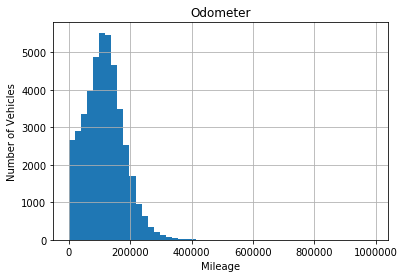

In [11]:
data['odometer'].hist(bins=50, range=(0, 990000));

plt.title("Odometer")
plt.xlabel("Mileage")
plt.ylabel("Number of Vehicles")

We have a very big amount of vehicles (entries) whose odometers are 0. Is it because they are brand new? or a glitch in the data? we also have an outlier with a mileage of 990,000...we don't want to delete these entries because they could be legitimate, so let's use the median of each model_year to fill in the missing values in the column.

For the missing data, we could group the cars by model_year, calculate the group's median mileage, and use it to fill the missing values for those vehicles beloning to that model_year group. These are the steps:

1. Group by model_year
2. Calculate median within each model_year group
3. Use mean to fill missing values within each group

In [12]:
#Calculate mileage average of each year
data.groupby('model_year')['odometer'].median().round()

model_year
1908.0    169328.0
1929.0         NaN
1936.0     30000.0
1948.0      4000.0
1949.0      1800.0
            ...   
2015.0     81195.0
2016.0     55932.0
2017.0     41426.0
2018.0     21200.0
2019.0     14152.0
Name: odometer, Length: 68, dtype: float64

Uh oh...we spotted a year, 1929, that has no odometer values at all, so no median could be calculated. Let's see how many vehicles belong to 1929.

In [13]:
data.loc[data["model_year"] == 1929]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,NaN,2018-11-18,59


Luckily there is only one vehicle from 1929, a ford f-150. This doesn't make much sense, as this model was introduced to the market in 1948. The entry must be corrupted, and since we are only dealing with one, it is better to just drop it.

In [14]:
corrupted_year = data[data["model_year"] == 1929].index
data.drop(corrupted_year, inplace=True)

Let's go the extra mile and make sure there are no years with decimal numbers, which could divide vehicles in different groups (i.e. 2010, and 2010.33). We will do so by rounding the model_year column.

In [15]:
data["model_year"] = data["model_year"].round()
data.groupby('model_year')['odometer'].median().round()

model_year
1908.0    169328.0
1936.0     30000.0
1948.0      4000.0
1949.0      1800.0
1954.0      3565.0
            ...   
2015.0     81195.0
2016.0     55932.0
2017.0     41426.0
2018.0     21200.0
2019.0     14152.0
Name: odometer, Length: 67, dtype: float64

Much better. Now we can use these median values to replace the missing values based on model_year. We could group the years in 5 or even 10, but mileage is one of the most important factors to take into account when purchasing a second-hand vehicle, so we want this value to be as accurate as possible.

In [16]:
data["odometer"] = data.groupby('model_year')['odometer'].transform(lambda x: x.fillna(x.median()))

In [17]:
data.isna().sum()

price               0
model_year          0
model               0
condition           0
cylinders        5260
fuel                0
odometer            0
transmission        0
type                0
paint_color         0
is_4wd          25952
date_posted         0
days_listed         0
dtype: int64

We are now with a complete odometer column! Let's move on to cylinders.

Text(0, 0.5, 'Count')

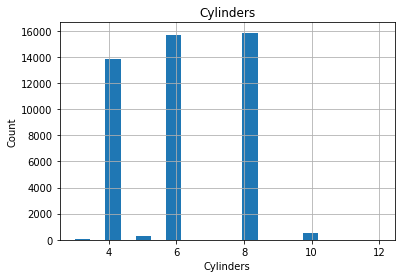

In [18]:
data["cylinders"].hist(bins=20);

plt.title("Cylinders")
plt.xlabel("Cylinders")
plt.ylabel("Count")

With cylinders, we could fill the missing values with the median of the models as with the mean we could get a non-realistic number of cylinders (with decimals). Similar to what we did in the previous step with the vehicles.

In [19]:
data.groupby('model')['cylinders'].median().round()

model
acura tl             6.0
bmw x5               6.0
buick enclave        6.0
cadillac escalade    8.0
chevrolet camaro     6.0
                    ... 
toyota sienna        6.0
toyota tacoma        6.0
toyota tundra        8.0
volkswagen jetta     4.0
volkswagen passat    4.0
Name: cylinders, Length: 100, dtype: float64

In [20]:
data["cylinders"] = data.groupby('model')['cylinders'].transform(lambda x: x.fillna(x.median()))

In [21]:
data["cylinders"].value_counts()

8.0     17711
6.0     17435
4.0     15499
10.0      549
5.0       294
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [22]:
data.isnull().sum()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
transmission        0
type                0
paint_color         0
is_4wd          25952
date_posted         0
days_listed         0
dtype: int64

We now have is_4wd column with missing values, so many of them missing. 

In [23]:
data["is_4wd"].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

As it is a Boolean column that contains only True values (1), it is fair to assume that the missing values are False. We need to correct this misleading entries, by replacing all missing values with 0.

In [24]:
data["is_4wd"] = data["is_4wd"].fillna(value = 0)

In [25]:
data["is_4wd"].value_counts()

0.0    25952
1.0    25572
Name: is_4wd, dtype: int64

In [26]:
data.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

We have dealt with missing values. Let's now review the data types.

### 2.2 Data Types <a class="anchor" id="section_2_2"></a>

We have now faced the "fixable" missing values. Let's focus on the data types of each column, to ease the analysis later on.

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 13 columns):
price           51524 non-null int64
model_year      51524 non-null float64
model           51524 non-null object
condition       51524 non-null object
cylinders       51524 non-null float64
fuel            51524 non-null object
odometer        51524 non-null float64
transmission    51524 non-null object
type            51524 non-null object
paint_color     51524 non-null object
is_4wd          51524 non-null float64
date_posted     51524 non-null object
days_listed     51524 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.5+ MB


In [28]:
data["model_year"] = data["model_year"].astype("int")

In [29]:
data["cylinders"] = data["cylinders"].astype("int")

In [30]:
data["odometer"] = data["odometer"].astype("int")

In [31]:
data["is_4wd"] = data["is_4wd"].astype("int")

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 13 columns):
price           51524 non-null int64
model_year      51524 non-null int64
model           51524 non-null object
condition       51524 non-null object
cylinders       51524 non-null int64
fuel            51524 non-null object
odometer        51524 non-null int64
transmission    51524 non-null object
type            51524 non-null object
paint_color     51524 non-null object
is_4wd          51524 non-null int64
date_posted     51524 non-null object
days_listed     51524 non-null int64
dtypes: int64(6), object(7)
memory usage: 5.5+ MB


In [33]:
data['model'].apply(type).unique()

array([<class 'str'>], dtype=object)

In [34]:
data['condition'].apply(type).unique()

array([<class 'str'>], dtype=object)

In [35]:
data['fuel'].apply(type).unique()

array([<class 'str'>], dtype=object)

In [36]:
data['transmission'].apply(type).unique()

array([<class 'str'>], dtype=object)

In [37]:
data['type'].apply(type).unique()

array([<class 'str'>], dtype=object)

In [38]:
data['paint_color'].apply(type).unique()

array([<class 'str'>], dtype=object)

In [39]:
data['date_posted'].apply(type).unique()

array([<class 'str'>], dtype=object)

All object columns seem to to have the appropiate data type (string) except for date_posted. It identifies as string, when it should be numeric. Let's see the format first and convert it.

In [40]:
data["date_posted"].value_counts()

2019-03-17    186
2019-01-05    184
2018-09-20    178
2019-03-11    176
2018-10-09    174
             ... 
2018-06-18    119
2018-07-04    118
2019-01-11    117
2018-06-08    117
2019-01-04    116
Name: date_posted, Length: 354, dtype: int64

In [41]:
data['date_posted'] = pd.to_datetime(data["date_posted"], format="%Y-%m-%d")

In [42]:
data['date_posted'].apply(type).unique()

array([<class 'pandas._libs.tslibs.timestamps.Timestamp'>], dtype=object)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 13 columns):
price           51524 non-null int64
model_year      51524 non-null int64
model           51524 non-null object
condition       51524 non-null object
cylinders       51524 non-null int64
fuel            51524 non-null object
odometer        51524 non-null int64
transmission    51524 non-null object
type            51524 non-null object
paint_color     51524 non-null object
is_4wd          51524 non-null int64
date_posted     51524 non-null datetime64[ns]
days_listed     51524 non-null int64
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 5.5+ MB


Great! now it is in date time format. The last step in this section is duplicates. Let's see if can find any, by first converting all string values to lower case.

In [44]:
data["model"] = data["model"].str.lower()

In [45]:
data["condition"] = data["condition"].str.lower()

In [46]:
data["fuel"] = data["fuel"].str.lower()

In [47]:
data["type"] = data["type"].str.lower()

In [48]:
data["paint_color"] = data["paint_color"].str.lower()

In [49]:
print('Duplicate entries in the table:', data.duplicated().sum())

Duplicate entries in the table: 0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 13 columns):
price           51524 non-null int64
model_year      51524 non-null int64
model           51524 non-null object
condition       51524 non-null object
cylinders       51524 non-null int64
fuel            51524 non-null object
odometer        51524 non-null int64
transmission    51524 non-null object
type            51524 non-null object
paint_color     51524 non-null object
is_4wd          51524 non-null int64
date_posted     51524 non-null datetime64[ns]
days_listed     51524 non-null int64
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 5.5+ MB


In this section, we have identified how many missing values are in every parameter of the dataset. Based on the value type (quantitative or qualitative), and the overall dataset, we replaced the missing values with medians, mean, or most common value, some times based on another parameter (model year for example). The ultimate goal is to make the dataset ready to analyze, but also using a logical approach to missing values. 

We have also adjusted the data types, mostly converting float values to integers, and dates to date time type.

As per **duplicates**, we converted all strings into lower case to ease the search, but no duplicates were found.

## Step 3. Make calculations and add them to the table <a class="anchor" id="chapter3"></a>

The date in which an ad is posted can be a strong influence in the price. To make our life easier in the analysis, let's narrow the date into day of the week, month and year, each in a new column.

In [51]:
data["month_posted"] = pd.DatetimeIndex(data["date_posted"]).month

In [52]:
data["month_posted"].value_counts()

10    4643
12    4564
3     4559
5     4503
8     4480
7     4471
9     4452
1     4452
11    4353
6     4216
2     4014
4     2817
Name: month_posted, dtype: int64

In [53]:
data["day_posted"] = pd.DatetimeIndex(data["date_posted"]).dayofweek

In [54]:
data["day_posted"].value_counts()

3    7510
5    7392
6    7355
0    7339
4    7334
2    7299
1    7295
Name: day_posted, dtype: int64

In [55]:
data["year_posted"] = pd.DatetimeIndex(data["date_posted"]).year

In [56]:
data["year_posted"].value_counts()

2018    35682
2019    15842
Name: year_posted, dtype: int64

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 16 columns):
price           51524 non-null int64
model_year      51524 non-null int64
model           51524 non-null object
condition       51524 non-null object
cylinders       51524 non-null int64
fuel            51524 non-null object
odometer        51524 non-null int64
transmission    51524 non-null object
type            51524 non-null object
paint_color     51524 non-null object
is_4wd          51524 non-null int64
date_posted     51524 non-null datetime64[ns]
days_listed     51524 non-null int64
month_posted    51524 non-null int64
day_posted      51524 non-null int64
year_posted     51524 non-null int64
dtypes: datetime64[ns](1), int64(9), object(6)
memory usage: 6.7+ MB


We have now created 3 additional columns in this dataset, based on the date_posted column: which day of the week it was posted (0 being Monday and 6 Sunday), month and year.

Just like most goods, it is very important to know how old or new a vehicle is. Let's add a column with the age (in years):

In [58]:
data["age"] = data["year_posted"] - data["model_year"]

In [59]:
data["age"].value_counts()

5     4008
4     3917
6     3853
7     3733
3     3503
      ... 
43       1
82       1
65       1
59       1
63       1
Name: age, Length: 67, dtype: int64

With vehicles it is also important to take into account the mileage; a 5 year old car with only 1000 miles could be in much better condition than a 2 year old car with 3000 miles for example. 
We see in the age column that some values have 0 years. This will lead to an error when dividing mileage/year, so we will change the 0 values for 1, since the car is technically in its first year of life.

In [60]:
data.loc[data["age"] == 0, "age"] = 1

In [61]:
data["age"].value_counts()

1     4351
5     4008
4     3917
6     3853
7     3733
      ... 
43       1
82       1
65       1
59       1
63       1
Name: age, Length: 66, dtype: int64

In [62]:
data["mileage_peryear"] = data["odometer"] / data["age"]

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 18 columns):
price              51524 non-null int64
model_year         51524 non-null int64
model              51524 non-null object
condition          51524 non-null object
cylinders          51524 non-null int64
fuel               51524 non-null object
odometer           51524 non-null int64
transmission       51524 non-null object
type               51524 non-null object
paint_color        51524 non-null object
is_4wd             51524 non-null int64
date_posted        51524 non-null datetime64[ns]
days_listed        51524 non-null int64
month_posted       51524 non-null int64
day_posted         51524 non-null int64
year_posted        51524 non-null int64
age                51524 non-null int64
mileage_peryear    51524 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(10), object(6)
memory usage: 7.5+ MB


In [64]:
data["mileage_peryear"] = data["mileage_peryear"].astype("int")

Lastly, let's replace the condition column to a string, so it is easier to read.

In [65]:
for value in data["condition"]:
    if value == 0:
        print("salvage")
    if value == 1:
        print("fair")
    if value == 2:
        print("good")
    if value == 3:
        print("excellent")
    if value == 4:
        print("like new")
    if value == 5:
        print("new")

In [66]:
data["condition"].value_counts()

excellent    24773
good         20144
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

**Conclusion**

In this section we have "extended" some of the data in the parameters. In other to calculate the age of a vehicle, we have split the date the ad was posted into year, month and day. We have also used the age parameter to calculate the average mileage per year each vehicle has. 

Lastly, we converted the condition into string keywords, to make it easier to understand the categorization of the vehicle.

## Step 4. Carry out exploratory data analysis <a class="anchor" id="chapter4"></a>

The dataset is finally ready to analyze. Let's begin by having a clear idea of each parameter. Let's use describe method to have the current stats handy.

In [67]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,month_posted,day_posted,year_posted,age,mileage_peryear
count,51524.00000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000
mean,12132.35104,2009.872603,6.121031,115129.388576,0.496312,39.554382,6.628406,3.005376,2018.307468,8.477137,18184.378270
std,10040.86718,6.134806,1.657452,62084.246037,0.499991,28.204413,3.474115,1.997735,0.461450,6.093387,13256.991489
min,1.00000,1908.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2018.000000,1.000000,0.000000
25%,5000.00000,2007.000000,4.000000,73289.000000,0.000000,19.000000,3.000000,1.000000,2018.000000,4.000000,10918.000000
50%,9000.00000,2011.000000,6.000000,113683.000000,0.000000,33.000000,7.000000,3.000000,2018.000000,7.000000,15360.000000
75%,16836.00000,2014.000000,8.000000,152735.750000,1.000000,53.000000,10.000000,5.000000,2019.000000,12.000000,21500.000000
max,375000.00000,2019.000000,12.000000,990000.000000,1.000000,271.000000,12.000000,6.000000,2019.000000,110.000000,373200.000000


### DATA Histograms <a class="anchor" id="chapter4.1"></a>

**PRICE** 

Text(0, 0.5, 'Count')

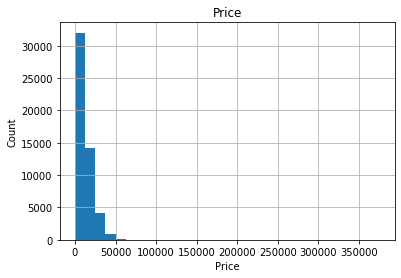

In [68]:
data['price'].hist(bins=30, range=(0, 375000));
plt.title("Price")
plt.xlabel("Price")
plt.ylabel("Count")

We see a big amount of vehicles with a price between 0 and 50k. Then why is the x axis displaying until 350000? If we have a look at the describe method output above, we see that the maximum price is 350,000. This is definitely an outlier, and perhaps there will be a lot more. Let's make a bookmark on this to investigate later. 

**VEHICLE'S AGE WHEN AD WAS POSTED**

Text(0, 0.5, 'Count')

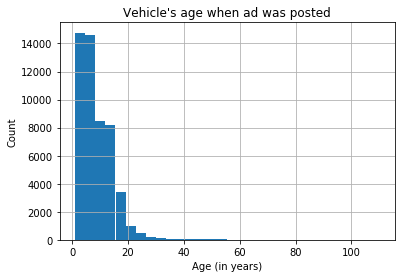

In [69]:
data['age'].hist(bins=30);
plt.title("Vehicle's age when ad was posted")
plt.xlabel("Age (in years)")
plt.ylabel("Count")

The bars range from 1 (remember we replaced all vehicles with "0" age to 1 year) all the way to 110 years! It is quite hard to believe such old cars are being posted for sale in a website. We will have to analyze the outliers here as well. 

**ODOMETER**

Text(0, 0.5, 'Count')

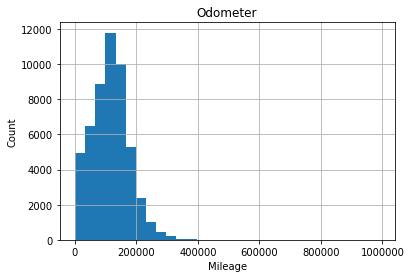

In [70]:
data['odometer'].hist(bins=30);
plt.title("Odometer")
plt.xlabel("Mileage")
plt.ylabel("Count")

Something similar happens here. At plain sight, we can see that most vehicles have between 0 and 400000 miles. However, the histogram's x axis goes all the way to 1 million miles! 

Text(0, 0.5, 'Count')

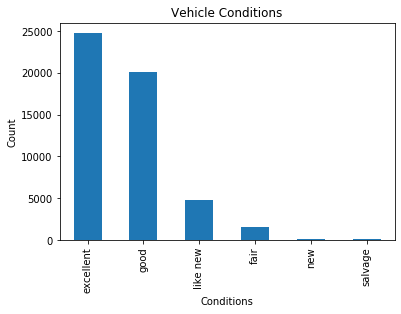

In [71]:
data['condition'].value_counts().plot(kind='bar');

plt.title("Vehicle Conditions")
plt.xlabel("Conditions")
plt.ylabel("Count")

**Conclusion**

Numerical parameters' histograms are not very readable due to the outliers in each of them. We will need to approach this in order to have access to data visualization more in detail. Let's filter the data, and store the outliers else where for now.

### Outliers <a class="anchor" id="chapter4.2"></a>

**PRICE**

(-500, 50000)

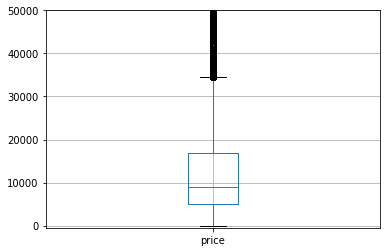

In [72]:
data.boxplot(column='price', return_type='axes')
plt.ylim(-500, 50000)

In [73]:
Q1_price = data['price'].quantile(0.25)
Q3_price = data['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

In [74]:
Q3_price+1.5*IQR_price

34590.0

We have found the price, above which outliers are held. We keep this number for now, and once we know the outliers limit from each numerical column, we will create a new table with the filtered data (without outliers), new_data.

**AGE**

(-10, 50)

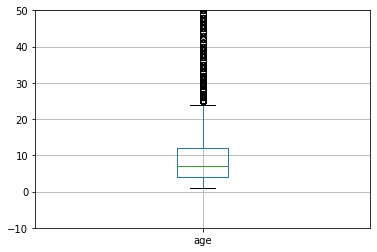

In [75]:
data.boxplot(column='age', return_type='axes')
plt.ylim(-10, 50)

In [76]:
Q1_age = data['age'].quantile(0.25)
Q3_age = data['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
Q3_age+1.5*IQR_age

24.0

In this case, all vehicles that are older than 24 are outliers. Let's put the non-outliers to the new_data dataset.

**MODEL YEAR**

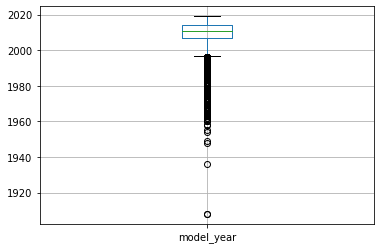

In [77]:
data.boxplot(column='model_year', return_type='axes');

In [78]:
Q1_model_year = data['model_year'].quantile(0.25)
Q3_model_year = data['model_year'].quantile(0.75)
IQR_model_year = Q3_model_year - Q1_model_year
Q1_model_year-1.5*IQR_model_year

1996.5

Model_year outliers are < 1996

**CYLINDER**

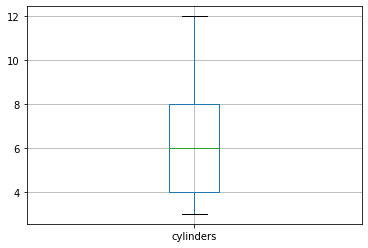

In [79]:
data.boxplot(column='cylinders', return_type='axes');

No outliers here, as expected.

**ODOMETER**

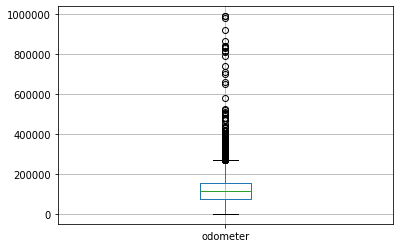

In [80]:
data.boxplot(column='odometer', return_type='axes');

In [81]:
Q1_odometer = data['odometer'].quantile(0.25)
Q3_odometer = data['odometer'].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer
Q3_odometer+1.5*IQR_odometer

271905.875

Odometer with > 271905.875 miles are outliers.

**DAYS LISTED**

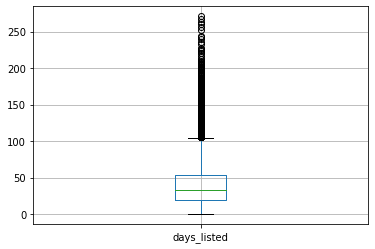

In [82]:
data.boxplot(column='days_listed', return_type='axes');

In [83]:
Q1_days_listed = data['days_listed'].quantile(0.25)
Q3_days_listed = data['days_listed'].quantile(0.75)
IQR_days_listed = Q3_days_listed - Q1_days_listed
Q3_days_listed+1.5*IQR_days_listed

104.0

All vehicles advertised for more than 104 days are outliers

**MILEAGE PER YEAR**

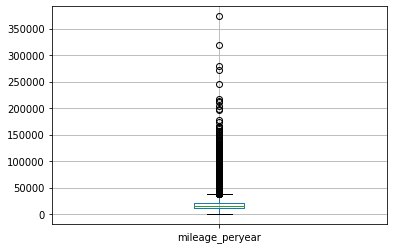

In [84]:
data.boxplot(column='mileage_peryear', return_type='axes');


In [85]:
Q1_mileage_peryear = data['mileage_peryear'].quantile(0.25)
Q3_mileage_peryear = data['mileage_peryear'].quantile(0.75)
IQR_mileage_peryear = Q3_mileage_peryear - Q1_mileage_peryear
Q3_mileage_peryear+1.5*IQR_mileage_peryear

37373.0

Those vehicles with a mileage per year of over 37373 are outliers.

Now that we have found the limit that defines the outliers in the columns, let's create the new_data dataframe to store the filtered data.

In [86]:
new_data = data.query("age < 24 and price < 34590 and model_year > 1996 and odometer < 271905.875 and days_listed < 104 and mileage_peryear < 37373")

In [87]:
#Confirm outliers are not in the new_data dataframe
new_data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,month_posted,day_posted,year_posted,age,mileage_peryear
count,43618.000000,43618.000000,43618.000000,43618.000000,43618.000000,43618.000000,43618.000000,43618.000000,43618.000000,43618.000000,43618.000000
mean,10965.647875,2009.873836,6.052364,114970.862901,0.484594,36.543216,6.563689,3.003278,2018.317507,8.473887,15833.641226
std,7695.994593,4.832017,1.648075,55763.521366,0.499768,23.009445,3.487865,1.996561,0.465512,4.784655,7237.342898
min,1.000000,1997.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2018.000000,1.000000,0.000000
25%,4995.000000,2007.000000,4.000000,78132.500000,0.000000,18.000000,3.000000,1.000000,2018.000000,5.000000,10918.000000
50%,8900.000000,2011.000000,6.000000,116000.000000,0.000000,32.000000,7.000000,3.000000,2018.000000,8.000000,14750.000000
75%,15495.000000,2014.000000,8.000000,152118.250000,1.000000,51.000000,10.000000,5.000000,2019.000000,12.000000,20181.000000
max,34555.000000,2019.000000,12.000000,271093.000000,1.000000,103.000000,12.000000,6.000000,2019.000000,22.000000,37368.000000


Let's pull the same histograms we did before filtering the data, and see how much influence the outliers had on the dataset.

### Filtered Data: Histograms <a class="anchor" id="chapter4.3"></a>

**PRICE**

Text(0, 0.5, 'Count')

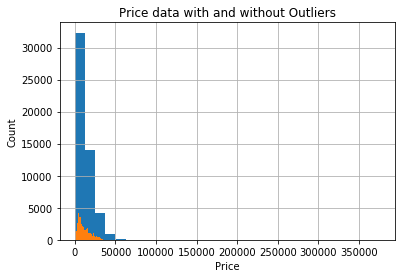

In [88]:
data['price'].hist(bins=30);
new_data['price'].hist(bins=30);

plt.title("Price data with and without Outliers")
plt.xlabel("Price")
plt.ylabel("Count")

Look the difference! let's just print the new_data (in orange) to see the range of the histogram.

Text(0, 0.5, 'Count')

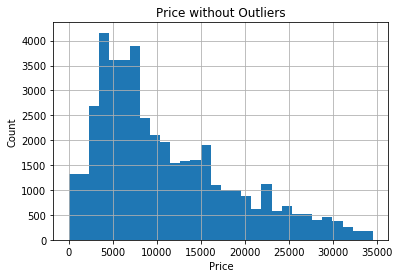

In [89]:
new_data['price'].hist(bins=30);
plt.title("Price without Outliers")
plt.xlabel("Price")
plt.ylabel("Count")

This is much easier to look at! we can clearly see the number of vehicles at each price.

**AGE**

Text(0, 0.5, 'Count')

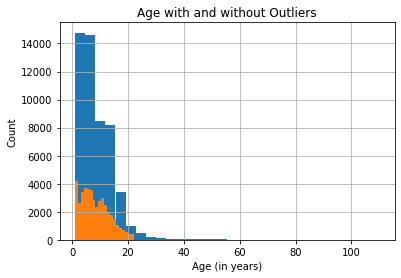

In [90]:
data['age'].hist(bins=30);
new_data['age'].hist(bins=20);

plt.title("Age with and without Outliers")
plt.xlabel("Age (in years)")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

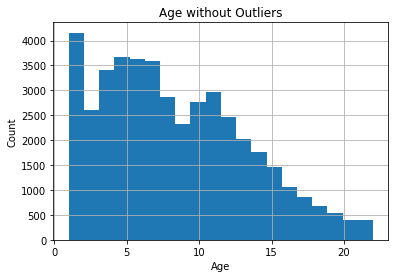

In [91]:
new_data['age'].hist(bins=20);

plt.title("Age without Outliers")
plt.xlabel("Age")
plt.ylabel("Count")

Data in age column is more grouped than before filtering outliers!

**ODOMETER**

Text(0, 0.5, 'Count')

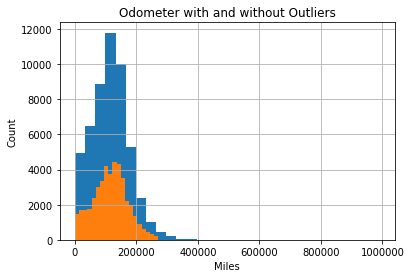

In [92]:
data['odometer'].hist(bins=30)
new_data['odometer'].hist(bins=20)

plt.title("Odometer with and without Outliers")
plt.xlabel("Miles")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

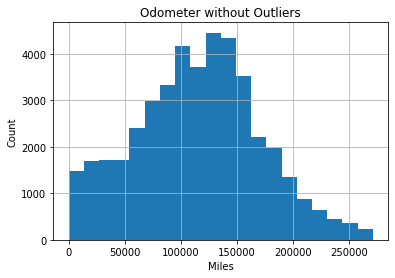

In [93]:
new_data['odometer'].hist(bins=20);
plt.title("Odometer without Outliers")
plt.xlabel("Miles")
plt.ylabel("Count")

Odometer values seem more realistic now. 

### DAYS LISTED <a class="anchor" id="chapter4.4"></a>

Let's plot a histogram of the days an ad was listed, including outliers:

Text(0, 0.5, 'Count')

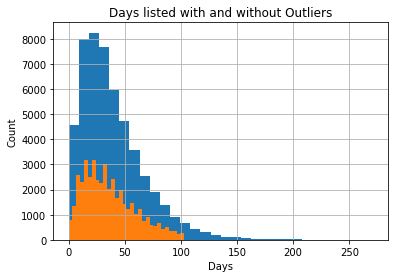

In [94]:
data['days_listed'].hist(bins=30);
new_data["days_listed"].hist(bins=30);
plt.title("Days listed with and without Outliers")
plt.xlabel("Days")
plt.ylabel("Count")

Removing the outliers makes a big impact on the histogram. Let's see how the mean and median look in each case:

In [95]:
#mean with outliers
data['days_listed'].mean()

39.55438242372487

In [96]:
#median with outliers
data['days_listed'].median()

33.0

In [97]:
#mean without outliers
new_data['days_listed'].mean()

36.543216103443534

In [98]:
#median with outliers
new_data['days_listed'].median()

32.0

The median is barely affected; the most common values are still the same. However, the mean has shifted from 39 to 36, which for this amount of entries is quite a change!

In [99]:
Q1_days_listed = new_data['days_listed'].quantile(0.25)
Q3_days_listed = new_data['days_listed'].quantile(0.75)
print("The typical lifetime of an ad is between:", Q1_days_listed, "and", Q3_days_listed, "days.")

The typical lifetime of an ad is between: 18.0 and 51.0 days.


In [100]:
short_listed = data[data["days_listed"] < Q1_days_listed]

In [101]:
long_listed = data[data["days_listed"] > Q3_days_listed]

**What determines the number of days an ad is posted?**

In [102]:
new_data.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,month_posted,day_posted,year_posted,age,mileage_peryear
price,1.000000,0.507329,0.314364,-0.451890,0.330661,0.002196,-0.023751,-0.001413,0.022213,-0.504252,0.194549
model_year,0.507329,1.000000,-0.152430,-0.631653,-0.020576,-0.001409,-0.041605,0.001759,0.042495,-0.994900,0.540064
cylinders,0.314364,-0.152430,1.000000,0.117155,0.415366,0.001349,0.003803,-0.004170,-0.002874,0.153142,-0.054894
odometer,-0.451890,-0.631653,0.117155,1.000000,0.052169,0.001007,0.022968,0.003285,-0.018325,0.625074,0.145864
is_4wd,0.330661,-0.020576,0.415366,0.052169,1.000000,0.003990,0.002924,0.002521,0.000085,0.021481,0.039560
days_listed,0.002196,-0.001409,0.001349,0.001007,0.003990,1.000000,-0.008473,0.003691,0.007654,0.002082,-0.002323
month_posted,-0.023751,-0.041605,0.003803,0.022968,0.002924,-0.008473,1.000000,0.007014,-0.821644,-0.036587,0.089430
day_posted,-0.001413,0.001759,-0.004170,0.003285,0.002521,0.003691,0.007014,1.000000,-0.007608,-0.002200,0.000648
year_posted,0.022213,0.042495,-0.002874,-0.018325,0.000085,0.007654,-0.821644,-0.007608,1.000000,0.052591,-0.108819
age,-0.504252,-0.994900,0.153142,0.625074,0.021481,0.002082,-0.036587,-0.002200,0.052591,1.000000,-0.554614


It is almost impossible to see what could be the reason an ad is lasting so short or so long. We have however seen that outliers have a big impact on the mean and median, so by removing them we have had a more accurate value of what makes an ad "too short" and what "too long". 

### ANALYSIS BASED ON VEHICLE TYPE <a class="anchor" id="chapter4.5"></a>

Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.

In [103]:
#number of ads per type of vehicle:

new_data.pivot_table(index="type", values="model", aggfunc="count")



,model
type,
bus,21
convertible,320
coupe,1834
hatchback,921
mini-van,1011
offroad,162
other,210
pickup,5646
sedan,10871


The 2 vehicle types with most ads are sedan and SUV

Text(0, 0.5, 'Count')

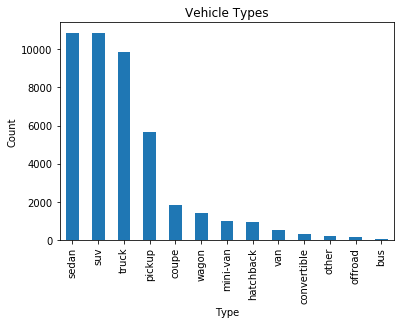

In [104]:
new_data['type'].value_counts().plot(kind='bar');

plt.title("Vehicle Types")
plt.xlabel("Type")
plt.ylabel("Count")

In [105]:
#average price per type of vehicle:

new_data.pivot_table(index="type", values="price", aggfunc="mean")

,price
type,
bus,18107.428571
convertible,13126.131250
coupe,13400.124318
hatchback,6624.608035
mini-van,7677.386746
offroad,14626.728395
other,9961.338095
pickup,14876.271520
sedan,6758.577868


 The highest average prices based on vehicle type are bus and pick up. The lowest average prices are sedan - which remember they have the highest number of ads, and  a hatchback.

Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color.

**SUV**

In [106]:
SUV = new_data[new_data["type"] == "suv"]

In [107]:
SUV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10848 entries, 0 to 51516
Data columns (total 18 columns):
price              10848 non-null int64
model_year         10848 non-null int64
model              10848 non-null object
condition          10848 non-null object
cylinders          10848 non-null int64
fuel               10848 non-null object
odometer           10848 non-null int64
transmission       10848 non-null object
type               10848 non-null object
paint_color        10848 non-null object
is_4wd             10848 non-null int64
date_posted        10848 non-null datetime64[ns]
days_listed        10848 non-null int64
month_posted       10848 non-null int64
day_posted         10848 non-null int64
year_posted        10848 non-null int64
age                10848 non-null int64
mileage_peryear    10848 non-null int64
dtypes: datetime64[ns](1), int64(11), object(6)
memory usage: 1.6+ MB


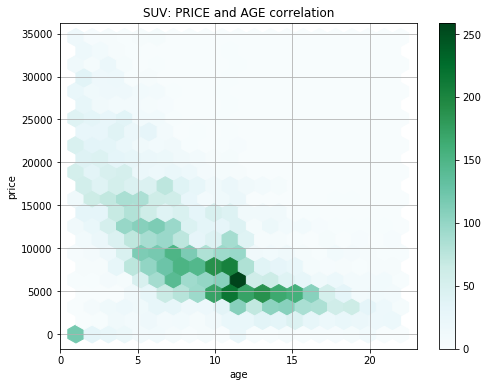

In [108]:
SUV.plot(x='age', y='price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True, title="SUV: PRICE and AGE correlation");

For SUV, there is a shy correlation between age and price. The older the SUV is, the lower the price tends to be. 

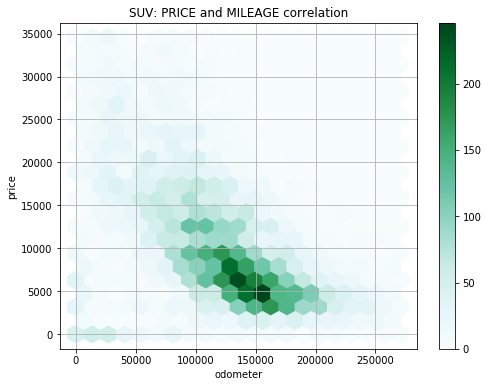

In [109]:
SUV.plot(x='odometer', y='price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True, title="SUV: PRICE and MILEAGE correlation");

We can also see a tendency of the price to lower with SUVs with higher mileage. 

To have a relevant analysis, from the categorical parameters let's just analize those categories with more than 50 ads.

In [110]:
SUV["condition"].value_counts()

excellent    5733
good         3830
like new      986
fair          267
new            17
salvage        15
Name: condition, dtype: int64

In [111]:
SUVfiltered_condition = SUV.query('condition not in ("new", "salvage")')

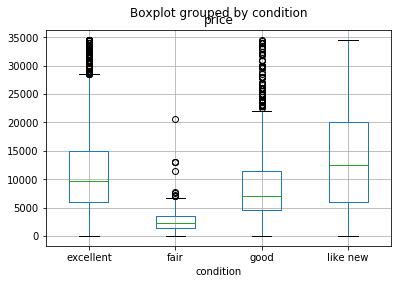

In [112]:
SUVfiltered_condition.boxplot(column=['price'], by='condition',
                     return_type='axes');

The SUV Condition with over 50 ads that seem to determine the price the most is fair (as Q3-Q1 is narrower). Those SUV that are "like new" have the widest range of prices, so the price for these is not defined by the condition.

In [113]:
SUV["transmission"].value_counts()

automatic    10288
manual         428
other          132
Name: transmission, dtype: int64

Text(0, 0.5, 'price')

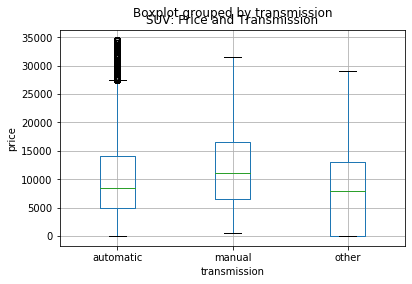

In [114]:
SUV.boxplot(column=['price'], by='transmission',
                     return_type='axes')

plt.title('SUV: Price and Transmission')
plt.xlabel('transmission')
plt.ylabel('price')

Manual transmission SUVs tend to have a higher price than automatic and others. However, I wouldn't consider this a key parameter that defines the price. 

In [115]:
SUV["paint_color"].value_counts()

unknown    1931
black      1912
white      1678
silver     1406
grey       1059
blue        920
red         812
green       380
brown       326
custom      277
orange       71
purple       38
yellow       38
Name: paint_color, dtype: int64

In [116]:
SUVfiltered_color = SUV.query('paint_color not in ("purple", "yellow")')

Text(0, 0.5, 'price')

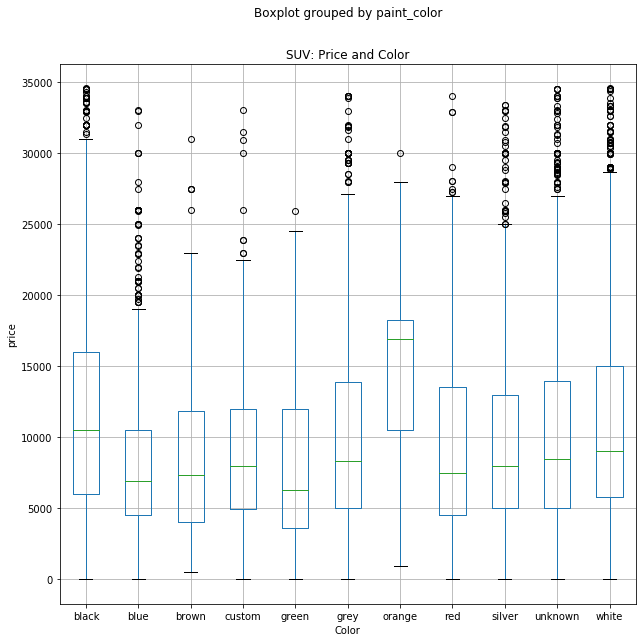

In [117]:
SUVfiltered_color.boxplot(column=['price'], by='paint_color',
                     return_type='axes',
           figsize= (10,10))

plt.title('SUV: Price and Color')
plt.xlabel('Color')
plt.ylabel('price')

Orange SUVs have the highest median price value, so it seems like a popular color for SUVs on sale. The next highest median is the black color. All the rest are pretty similar between them. I wouldn't say paint_color is a key parameter that defines the price of SUVs, as the Q3-Q1 are pretty wide in each color. 

**SEDAN**

In [118]:
SEDAN = new_data[new_data["type"] == "sedan"]

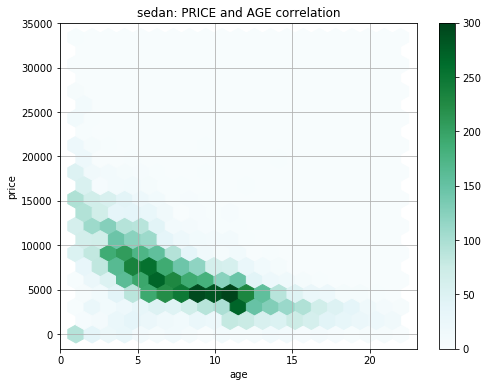

In [119]:
SEDAN.plot(x='age', y='price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True, title="sedan: PRICE and AGE correlation");

The correlation between age and price is very similar to the SUV; however the price is stable in Sedans between 6 and 12 years old, around 5000. Those present the highest correlation between these 2 parameters.

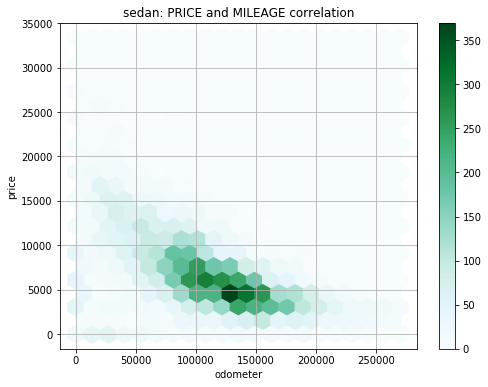

In [120]:
SEDAN.plot(x='odometer', y='price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True, title="sedan: PRICE and MILEAGE correlation");

The correlation between mileage and price is very similar to the SUV as well, so Mileage is not particularly affecting the price by type of vehicle.

In [121]:
SEDAN["condition"].value_counts()

excellent    5480
good         3919
like new     1147
fair          252
new            40
salvage        33
Name: condition, dtype: int64

In [122]:
SEDANfiltered_condition = SEDAN.query('condition not in ("new", "salvage")')

Text(0, 0.5, 'price')

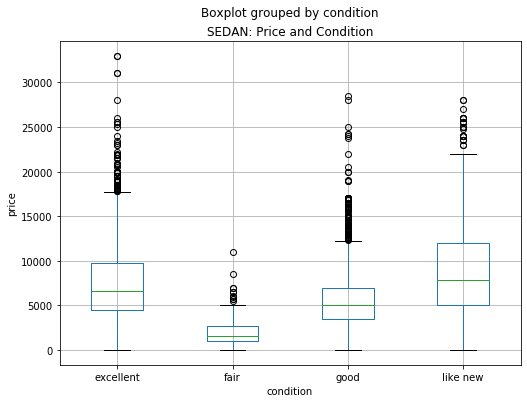

In [123]:
SEDANfiltered_condition.boxplot(column=['price'], by='condition',
                     return_type='axes',
             figsize=(8, 6))

plt.title('SEDAN: Price and Condition')
plt.xlabel('condition')
plt.ylabel('price')

The condition in which sedan is sold seems to have quite an impact on the price. Those in "fair" condition have a very similar price between them, which is around 2500 or less. On the other hand, those sedan with "excellent" or "like new" condition have more dispersion in the price, so the correlation is not as strong as in "fair" condition. 

In [124]:
SEDAN["transmission"].value_counts()

automatic    10236
manual         523
other          112
Name: transmission, dtype: int64

Text(0, 0.5, 'price')

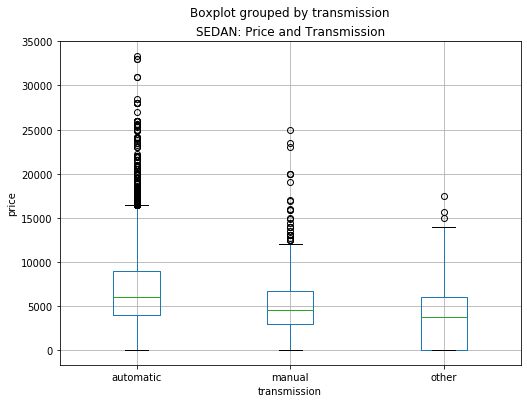

In [125]:
SEDAN.boxplot(column=['price'], by='transmission',
                     return_type='axes',
             figsize=(8, 6))

plt.title('SEDAN: Price and Transmission')
plt.xlabel('transmission')
plt.ylabel('price')

Again, the price in each transmission type is quite similar for sedans, so it is not a key parameter that defines the price of the vehicle.

In [126]:
SEDAN["paint_color"].value_counts()

unknown    1966
silver     1837
black      1574
grey       1445
white      1338
blue       1115
red         854
custom      265
brown       239
green       187
purple       22
yellow       20
orange        9
Name: paint_color, dtype: int64

In [127]:
SEDANfiltered_color = SEDAN.query('paint_color not in ("purple", "yellow", "orange")')

Text(0, 0.5, 'price')

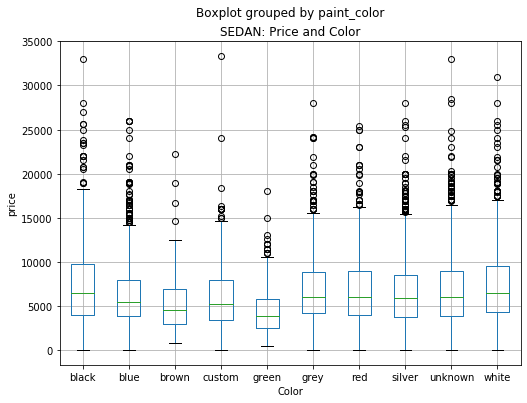

In [128]:
SEDANfiltered_color.boxplot(column=['price'], by='paint_color',
                     return_type='axes',
             figsize=(8, 6))

plt.title('SEDAN: Price and Color')
plt.xlabel('Color')
plt.ylabel('price')

There is no correlation between price and color for sedan type of vehicles. They all have similar Boxplots, and quite similar median values of price. 

**Conclusion**

Exploring data, we realized that we still had to do some cleaning, because histograms were very hard to read due to the dispersion of the outliers. We found the delimitations of the data, removed them from "Age", "Odometer", "Price" and "Condition" and stored the new dataset in a filtered one, "new_data".

We then compared the data with and without outliers, and saw a great difference pulling the same graphs.

We also tried to figure out why some vehicles were listed for a very short time, and why some others for a long time. Our hypothesis was that perhaps the condition or the mileage per year could be a potential cause, but we did not find any relevant correlation on that.

Lastly, we took the 2 types of vehicles which were advertised the most, and analyzed which parameter influenced the price the most. The details are in the overall conclusion. 

## Step 5. Overall conclusion <a class="anchor" id="chapter5"></a>

Once the data has been processed and polished to analyze, we have identified the outliers in the most important parameters, and after comparing the data with and without them, we decided to filter them out in order to have a more accurate analysis. 

We have pulled the type of vehicles with most amount of ads, and used them to study what parameters influence the price of a vehicle the most. 

After pulling some correlation graphs, we come to the conclusion that age, odometer and condition have the biggest impact on the price. The correlation coeficients are as follows:

**FOR SUV**
* Age: -0.57
* Odometer (mileage): -0.52
* Condition: see boxplot above

**FOR SEDAN**
* Age: -0.6
* Odometer (mileage): -0.56
* Condition: see boxplot above

In [129]:
SUV.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,month_posted,day_posted,year_posted,age,mileage_peryear
price,1.000000,0.575171,0.014734,-0.520579,0.116455,-0.017539,-0.020552,0.011433,0.016919,-0.574725,0.252881
model_year,0.575171,1.000000,-0.265975,-0.642067,-0.061381,-0.008833,-0.040102,0.004717,0.038283,-0.994632,0.572305
cylinders,0.014734,-0.265975,1.000000,0.234859,0.118663,0.004824,0.005916,-0.008451,-0.006142,0.265730,-0.107706
odometer,-0.520579,-0.642067,0.234859,1.000000,0.026951,0.009881,0.023559,0.009420,-0.021618,0.634663,0.100144
is_4wd,0.116455,-0.061381,0.118663,0.026951,1.000000,-0.009326,-0.000322,0.013152,-0.003842,0.060704,-0.030833
days_listed,-0.017539,-0.008833,0.004824,0.009881,-0.009326,1.000000,-0.000274,-0.005268,0.000043,0.008566,0.001312
month_posted,-0.020552,-0.040102,0.005916,0.023559,-0.000322,-0.000274,1.000000,0.027018,-0.820622,-0.040587,0.096127
day_posted,0.011433,0.004717,-0.008451,0.009420,0.013152,-0.005268,0.027018,1.000000,-0.025153,-0.007387,0.009545
year_posted,0.016919,0.038283,-0.006142,-0.021618,-0.003842,0.000043,-0.820622,-0.025153,1.000000,0.059779,-0.121264
age,-0.574725,-0.994632,0.265730,0.634663,0.060704,0.008566,-0.040587,-0.007387,0.059779,1.000000,-0.587952


In [130]:
SEDAN.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,month_posted,day_posted,year_posted,age,mileage_peryear
price,1.000000,0.609501,-0.033782,-0.562165,0.045619,-0.001551,-0.040129,-0.002184,0.033969,-0.603572,0.184590
model_year,0.609501,1.000000,-0.117127,-0.637766,0.073894,-0.001556,-0.057559,0.004189,0.053518,-0.993809,0.509849
cylinders,-0.033782,-0.117127,1.000000,0.075939,0.214671,-0.002011,0.000646,-0.008097,-0.006699,0.119010,-0.070299
odometer,-0.562165,-0.637766,0.075939,1.000000,-0.062141,0.000114,0.035035,-0.002138,-0.022922,0.631102,0.171891
is_4wd,0.045619,0.073894,0.214671,-0.062141,1.000000,0.001863,0.007295,-0.020300,-0.004002,-0.071092,0.018172
days_listed,-0.001551,-0.001556,-0.002011,0.000114,0.001863,1.000000,-0.008625,0.006049,0.013804,0.003218,-0.008143
month_posted,-0.040129,-0.057559,0.000646,0.035035,0.007295,-0.008625,1.000000,0.004339,-0.822963,-0.029256,0.093428
day_posted,-0.002184,0.004189,-0.008097,-0.002138,-0.020300,0.006049,0.004339,1.000000,-0.006841,-0.004734,0.006282
year_posted,0.033969,0.053518,-0.006699,-0.022922,-0.004002,0.013804,-0.822963,-0.006841,1.000000,0.051849,-0.112664
age,-0.603572,-0.993809,0.119010,0.631102,-0.071092,0.003218,-0.029256,-0.004734,0.051849,1.000000,-0.525945


We have also considered ads as too short if they were listed for less than 19 days, and too long if listed for more than 53 days. However, there were no particular parameter that defined the time an ad was posted. 